In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# Create a 5 Hz sine wave

waveFreq = 5 #Hz
sampleFreq = 300 # Hz
cycles = 10
t = np.linspace(0,cycles / waveFreq, int(cycles*sampleFreq/waveFreq))    # Generate sin wave for 2.5 cycles
wave = np.sin(2*np.pi*waveFreq*t)

Text(0.5, 1.0, '5 Hz sin wave sampled at 300 Hz for 10 cycles')

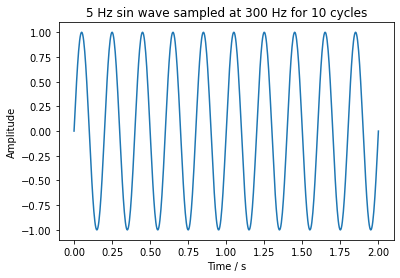

In [71]:
plt.plot(t, wave)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title(f"{waveFreq} Hz sin wave sampled at {sampleFreq} Hz for {cycles} cycles")

Text(0.5, 0, 'Freq / Hz')

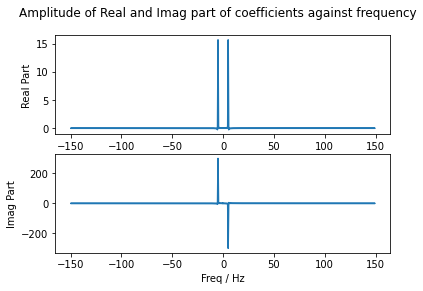

In [68]:
# DFT Analysis

fig, axs = plt.subplots(nrows=2)
fig.suptitle("Amplitude of Real and Imag part of coefficients against frequency")
 
sp = np.fft.fft(wave)        # Fourier coefficients (complex)
freqBins = np.fft.fftfreq(len(wave), 1/sampleFreq)   # Freq bins

axs[0].plot(freqBins, sp.real)      # NOTE: Could also plot sp.imag, but it shd be the same as the real part??
axs[0].set_ylabel("Real Part")
axs[0].set_xlabel("Freq / Hz")

axs[1].plot(freqBins, sp.imag)
axs[1].set_ylabel("Imag Part")
axs[1].set_xlabel("Freq / Hz")

Peak Freq at 5.00 Hz



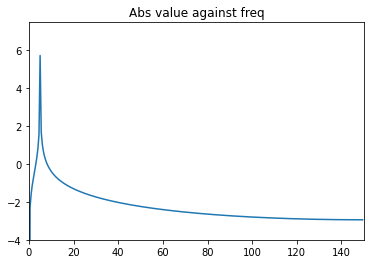

In [69]:
# Plot the absolute values of the +ve freq

# Remove -ve freq
freqBins = freqBins[:int(len(freqBins)/2)]
sp = sp[:int(len(sp)/2)]

# Take the absolut value of sp
sp = np.absolute(sp)

plt.plot(freqBins, np.log(sp))
plt.xlim(0, sampleFreq/2)
plt.ylim(-4)
plt.title("Abs value against freq")
plt.xlabel("Freq / Hz")
plt.ylabel("dB")

print(f"Peak Freq at {freqBins[np.argmax(sp)]:.2f} Hz\n")